[![Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/pixeltable/pixeltable/blob/master/docs/release/tutorials/working-with-together.ipynb)&nbsp;&nbsp;
[![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/pixeltable/pixeltable/blob/master/docs/release/tutorials/working-with-together.ipynb)

# Working with Together AI Pixeltable

### Prerequisites
- A Together AI account with an API key (https://api.together.ai/settings/api-keys)

### Important Notes

- Together.ai usage may incur costs based on your Together.ai plan.
- Be mindful of sensitive data and consider security measures when integrating with external services.

First you'll need to install required libraries and enter your Together API key.

In [1]:
%pip install -q pixeltable together

Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.

[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: C:\Users\brune\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import os
import getpass

if 'TOGETHER_API_KEY' not in os.environ:
    os.environ['TOGETHER_API_KEY'] = getpass.getpass('Together API Key: ')

Now let's create a Pixeltable directory to hold the tables for our demo.

In [3]:
import pixeltable as pxt

pxt.create_dir('together_demo', ignore_errors=True)

Creating a Pixeltable instance at: C:\Users\brune\.pixeltable
Connected to Pixeltable database at: postgresql://postgres:@127.0.0.1:60074/pixeltable
Created directory `together_demo`.


## Completions

Create a Table: In Pixeltable, create a table with columns to represent your input data and the columns where you want to store the results from Together.ai.

In [4]:
from pixeltable.functions.together import completions

# Create a table in Pixeltable and pick a model hosted on Together with some parameters

t = pxt.create_table('together_demo.completions', {'input': pxt.StringType()})

t['output'] = completions(
    prompt=t.input,
    model='mistralai/Mixtral-8x7B-v0.1',
    max_tokens=300,
    stop=['\n'],
    temperature=0.7,
    top_p=0.9,
    top_k=40,
    repetition_penalty=1.1,
    logprobs=1,
    echo=True,
    n=3,
)

Created table `completions`.
Added 0 column values with 0 errors.


In [5]:
t.describe()

Column Name,Type,Computed With
input,string,
output,json,"completions(input, stop=[ ], logprobs=1, temperature=0.7, max_tokens=300, model='mistralai/Mixtral-8x7B-v0.1', top_k=40, echo=True, n=3, top_p=0.9, repetition_penalty=1.1)"


In [6]:
# Parse the response (output) into a new column
t['response'] = t.output.choices[0].text

Added 0 column values with 0 errors.


In [7]:
# Start a conversation
t.insert(input='I want to rule')
t.select(t.input, t.response).show()

Inserting rows into `completions`: 1 rows [00:00, 306.58 rows/s]██| 3/3 [00:02<00:00,  1.27 cells/s]
Computing cells: 100%|████████████████████████████████████████████| 3/3 [00:02<00:00,  1.26 cells/s]
Inserted 1 row with 0 errors.


input,response
I want to rule,over my own life and not have someone else do it for me.


## Chat Completions

In [8]:
from pixeltable.functions.together import chat_completions

# Create a table in Pixeltable and pick a model hosted on Together with some parameters

chat_t = pxt.create_table('together_demo.chat', {'input': pxt.StringType()})

messages = [{'role': 'user', 'content': chat_t.input}]
chat_t['output'] = chat_completions(
    messages=messages,
    model='mistralai/Mixtral-8x7B-Instruct-v0.1',
    max_tokens=300,
    stop=['\n'],
    temperature=0.7,
    top_p=0.9,
    top_k=40,
    repetition_penalty=1.1,
    logprobs=1,
    echo=True,
    n=3,
)

Created table `chat`.
Added 0 column values with 0 errors.


In [9]:
chat_t.describe()

Column Name,Type,Computed With
input,string,
output,json,"chat_completions([{'role': 'user', 'content': input}], stop=[ ], logprobs=1, temperature=0.7, max_tokens=300, model='mistralai/Mixtral-8x7B-Instruct-v0.1', top_k=40, echo=True, n=3, top_p=0.9, repetition_penalty=1.1)"


In [10]:
# Parse the bot response (output) into a new column
chat_t['response'] = chat_t.output.choices[0].message.content

Added 0 column values with 0 errors.


In [11]:
# Start a conversation
chat_t.insert(input='Can you make me a coffee?')
chat_t.select(chat_t.input, chat_t.response).show()

Inserting rows into `chat`: 1 rows [00:00, 277.24 rows/s]█████████| 3/3 [00:00<00:00,  3.37 cells/s]
Computing cells: 100%|████████████████████████████████████████████| 3/3 [00:00<00:00,  3.34 cells/s]
Inserted 1 row with 0 errors.


input,response
Can you make me a coffee?,"I'm sorry for any confusion, but I'm unable to physically make you a coffee as I'm just a text-based program running on computers. However, I can help you find a recipe or give instructions on how to make one if you'd like!"


## Embeddings

In [12]:
from pixeltable.functions.together import embeddings

emb_t = pxt.create_table('together_demo.embeddings', {'input': pxt.StringType()})
emb_t['embed'] = embeddings(
    input=emb_t.input,
    model='togethercomputer/m2-bert-80M-8k-retrieval'
)

Created table `embeddings`.
Added 0 column values with 0 errors.


In [13]:
emb_t.insert(input='Together AI provides a variety of embeddings models.')

Inserting rows into `embeddings`: 1 rows [00:00, ? rows/s]        | 1/2 [00:01<00:01,  1.10s/ cells]
Computing cells: 100%|████████████████████████████████████████████| 2/2 [00:01<00:00,  1.80 cells/s]
Inserted 1 row with 0 errors.


UpdateStatus(num_rows=1, num_computed_values=2, num_excs=0, updated_cols=[], cols_with_excs=[])

In [14]:
emb_t.head()

input,embed
Together AI provides a variety of embeddings models.,[ 0.016 -0.21 0.201 0.153 -0.339 0.164 ... -0.049 0.003 -0.157 0.178 -0.063 -0.168]


## Image Generations

In [15]:
from pixeltable.functions.together import image_generations

image_t = pxt.create_table('together_demo.images', {'input': pxt.StringType(), 'negative_prompt': pxt.StringType(nullable=True)})
image_t['img'] = image_generations(image_t.input, model='runwayml/stable-diffusion-v1-5')
image_t['img_2'] = image_generations(
    image_t.input,
    model='stabilityai/stable-diffusion-2-1',
    steps=30,
    seed=4171780,
    height=768,
    width=512,
    negative_prompt=image_t.negative_prompt
)

Created table `images`.
Added 0 column values with 0 errors.
Added 0 column values with 0 errors.


In [16]:
# Start generating Images
image_t.insert([
  {'input': 'A friendly dinosaur playing tennis in a cornfield'},
  {'input': 'A friendly dinosaur playing tennis in a cornfield',
    'negative_prompt': 'tennis court'}
])

Inserting rows into `images`: 2 rows [00:00, ? rows/s]                    | 0/4 [00:00<?, ? cells/s]
Computing cells: 100%|████████████████████████████████████████████████████| 4/4 [00:00<?, ? cells/s]
Inserted 2 rows with 0 errors.


UpdateStatus(num_rows=2, num_computed_values=4, num_excs=0, updated_cols=[], cols_with_excs=[])

In [17]:
image_t.describe()
image_t.select(image_t.input, image_t.negative_prompt).show()

Column Name,Type,Computed With
input,string,
negative_prompt,string,
img,image,"image_generations(input, model='runwayml/stable-diffusion-v1-5')"
img_2,image,"image_generations(input, width=512, model='stabilityai/stable-diffusion-2-1', negative_prompt=negative_prompt, steps=30, seed=4171780, height=768)"


input,negative_prompt
A friendly dinosaur playing tennis in a cornfield,None
A friendly dinosaur playing tennis in a cornfield,tennis court


input,negative_prompt,img,img_2
A friendly dinosaur playing tennis in a cornfield,None,,
A friendly dinosaur playing tennis in a cornfield,tennis court,,

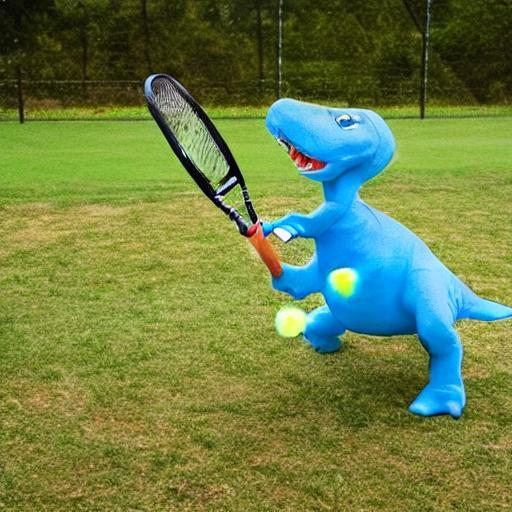
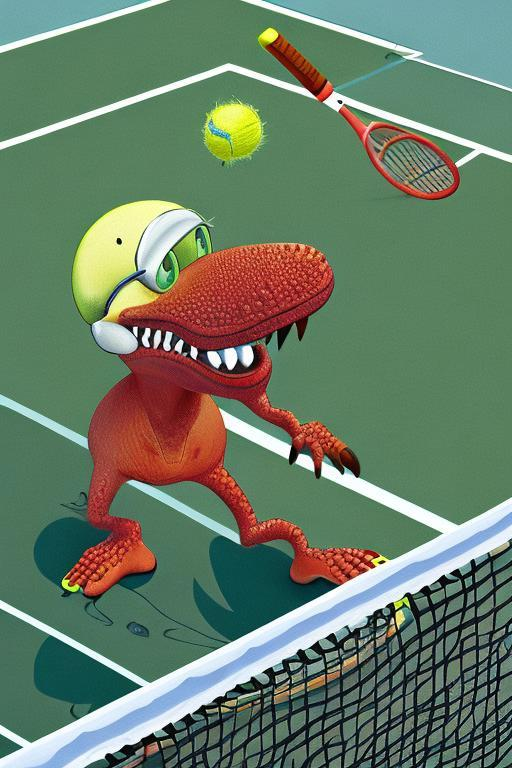
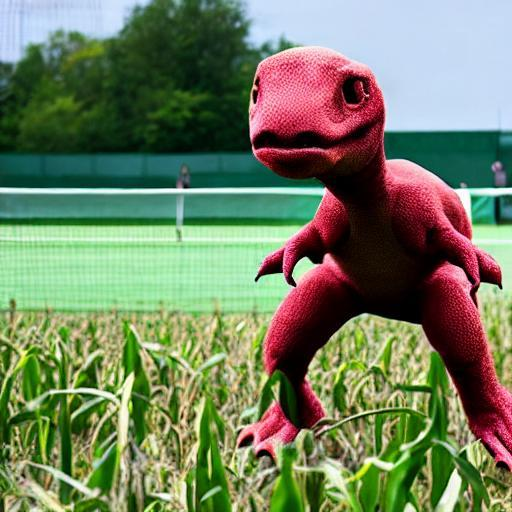
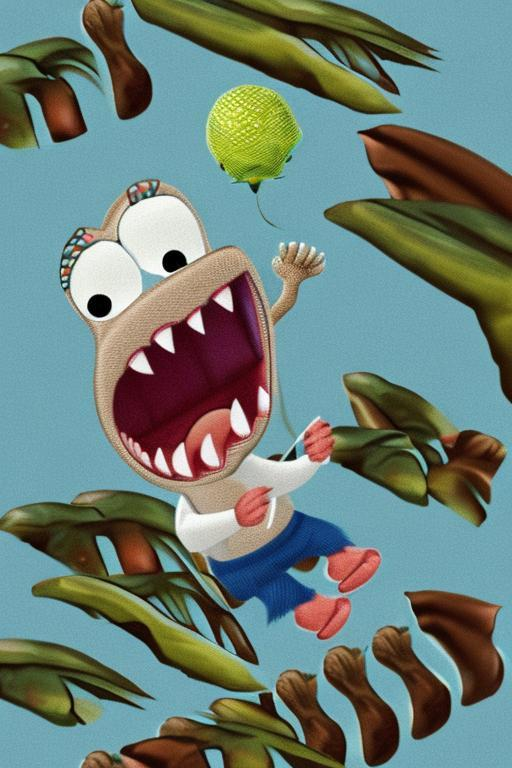

In [18]:
image_t.show()

### Learn More

To learn more about advanced techniques like RAG operations in Pixeltable, check out the [RAG Operations in Pixeltable](https://pixeltable.readme.io/docs/rag-operations-in-pixeltable) tutorial.

You can also look at how to work with images in Pixeltable: [Working with Images](https://pixeltable.readme.io/docs/working-with-images).

If you have any questions, don't hesitate to reach out.